In [1]:
# based on: https://arxiv.org/pdf/1811.10655.pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [10]:
def rhs_theta(t, y, m_a, epsilon):
    theta, theta_dot = y
    H = 1 / (2*t)
    Z = 2 / (1 + 2*epsilon**2 - np.cos(theta))
    dZdtheta = - 2*np.sin(theta) / (2*epsilon**2 - np.cos(theta) + 1)**2
    # U = 1 - cos(theta)
    dUdtheta = np.sin(theta)
    theta_dotdot = - 1 / (2*Z) * dZdtheta * theta_dot**2 - 3*H*theta_dot - m_a**2 * 1 / Z * dUdtheta
    return theta_dot, theta_dotdot

In [67]:
# m_a**2 = Gamma**4 / f_a**2
# m_a = Gamma**2 / f_a
m_a = 1e-8 # a.u. for now
epsilon = 1e-3
theta_i = 1
switch_hubble_and_time = lambda x: 1 / (2*x)
tspan = (switch_hubble_and_time(m_a * 1e2), switch_hubble_and_time(m_a * 1e-7))
steps = np.geomspace(*tspan, 1000); steps[0] = tspan[0]; steps[-1] = tspan[-1]
sol = solve_ivp(rhs_theta, tspan, [theta_i, 0.0], args=(m_a, epsilon), rtol=1e-8, method="Radau", t_eval=steps)
assert sol.success
t = sol.t; theta, theta_dot = sol.y

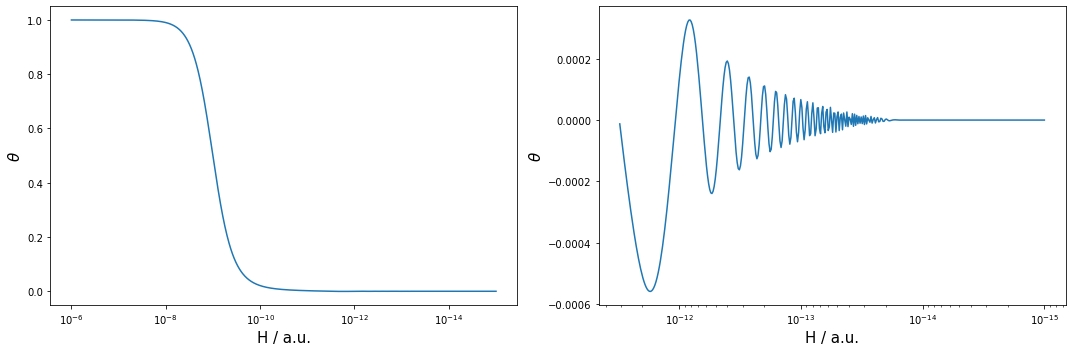

In [69]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.semilogx(switch_hubble_and_time(t), theta)
plt.gca().invert_xaxis()
plt.xlabel("H / a.u.", fontsize=15); plt.ylabel(r"$\theta$", fontsize=15)
plt.subplot(1,2,2)
fst_root_idx = np.where(theta < 0)[0][0]
plt.semilogx(switch_hubble_and_time(t[fst_root_idx:]), theta[fst_root_idx:])
plt.xlabel("H / a.u.", fontsize=15); plt.ylabel(r"$\theta$", fontsize=15)
plt.gca().invert_xaxis()
plt.tight_layout()

In [ ]:
def theta_to_phi(theta):
    